# Weather Austerila Forcasting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('classification/weatherAUS.csv')

In [3]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

# Feature Enginnering

In [4]:
df.drop('Date',axis=1,inplace=True)

<AxesSubplot:>

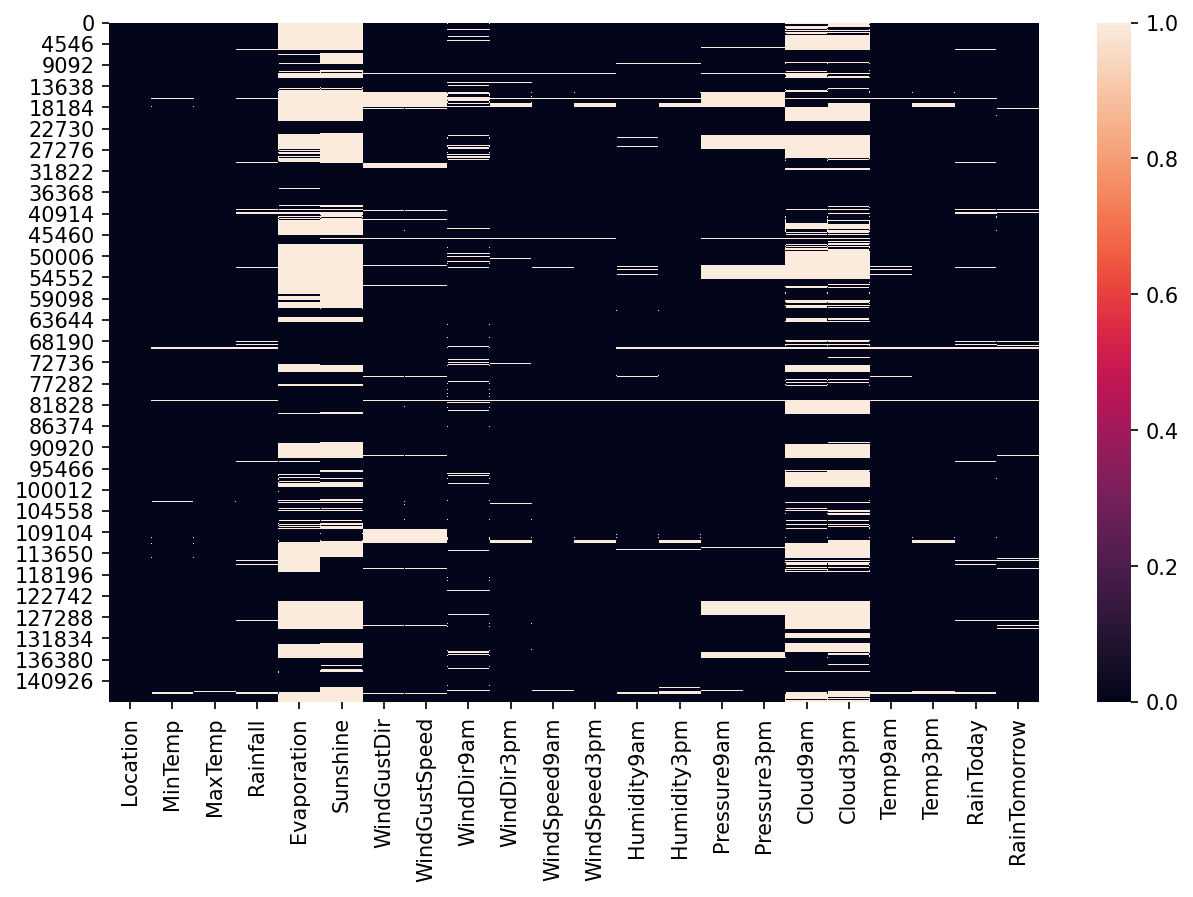

In [5]:
plt.figure(figsize=(10,6),dpi=150)
sns.heatmap(data=df.isnull())

Here we can see null value with white colour there are some feature with less null value and some are have plennty of null values.





lets start removing and filling null values with each features

In [6]:
df['MinTemp'].isnull().sum() # here Mintemp feature are just have 1485 null value so i filled them with its mean values

1485

In [7]:
df['MinTemp'].fillna(df['MinTemp'].mean(),inplace=True)

<AxesSubplot:>

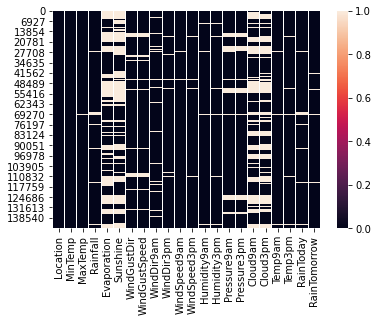

In [8]:
sns.heatmap(data=df.isnull()) # now same processe for less missing values

In [9]:
# now same processe for less missing values

In [10]:
df['MaxTemp'].fillna(df['MaxTemp'].mean(),inplace=True)

In [11]:
df['Rainfall'].fillna(df['Rainfall'].mean(),inplace=True)

In [12]:
df['Evaporation'].isnull().sum()

62790

In [13]:
len(df['Evaporation']) # fature Evaporation has missing value more then 10% of all data length so i dropped that feature.

145460

In [14]:
df.drop('Evaporation',axis=1,inplace=True)#cloud9am and cloud3am also has missing value more then 10% so i dropped that feature.

In [15]:
df.drop('Cloud3pm',axis=1,inplace=True)

In [16]:
df.drop('Cloud9am',axis=1,inplace=True)

In [17]:
df.drop('Sunshine',axis=1,inplace=True)

<AxesSubplot:>

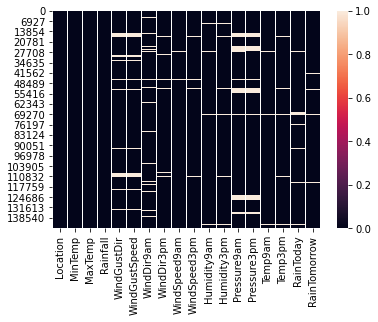

In [18]:
sns.heatmap(data=df.isnull()) # now this feature are filled by their mean values

In [19]:
df['WindGustDir'].fillna(df['WindGustDir'].mode(),inplace=True) 
#this is the object type feature so filled them with most frequent values by mode(),and same for rest null value object fatures 

In [20]:
df['WindGustSpeed'].fillna(df['WindGustSpeed'].mode(),inplace=True)

In [21]:
df['WindDir3pm'].fillna(df['WindDir3pm'].mode(),inplace=True)

In [22]:
df['WindDir9am'].fillna(df['WindDir9am'].mode(),inplace=True) # now i dropped all remeanning null values.

In [23]:
df.dropna(inplace=True)

<AxesSubplot:>

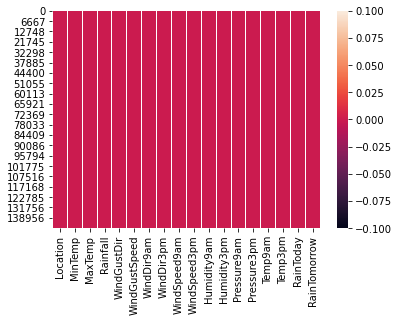

In [24]:
sns.heatmap(data=df.isnull()) # all null values are dropped and filled.

# EDA (Exploratory data analysis )

In [25]:
df.head()

Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed WindDir9am  \
0   Albury     13.4     22.9       0.6           W           44.0          W   
1   Albury      7.4     25.1       0.0         WNW           44.0        NNW   
2   Albury     12.9     25.7       0.0         WSW           46.0          W   
3   Albury      9.2     28.0       0.0          NE           24.0         SE   
4   Albury     17.5     32.3       1.0           W           41.0        ENE   

  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0        WNW          20.0          24.0         71.0         22.0   
1        WSW           4.0          22.0         44.0         25.0   
2        WSW          19.0          26.0         38.0         30.0   
3          E          11.0           9.0         45.0         16.0   
4         NW           7.0          20.0         82.0         33.0   

   Pressure9am  Pressure3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       1007.7       1007.1     16.9     21.8        No           No  
1       1010.6       1007.8     17.2     24.3        No           No  
2       1007.6       1008.7     21.0     23.2        No           No  
3       1017.6       1012.8     18.1     26.5        No           No  
4       1010.8       1006.0     17.8     29.7        No           No

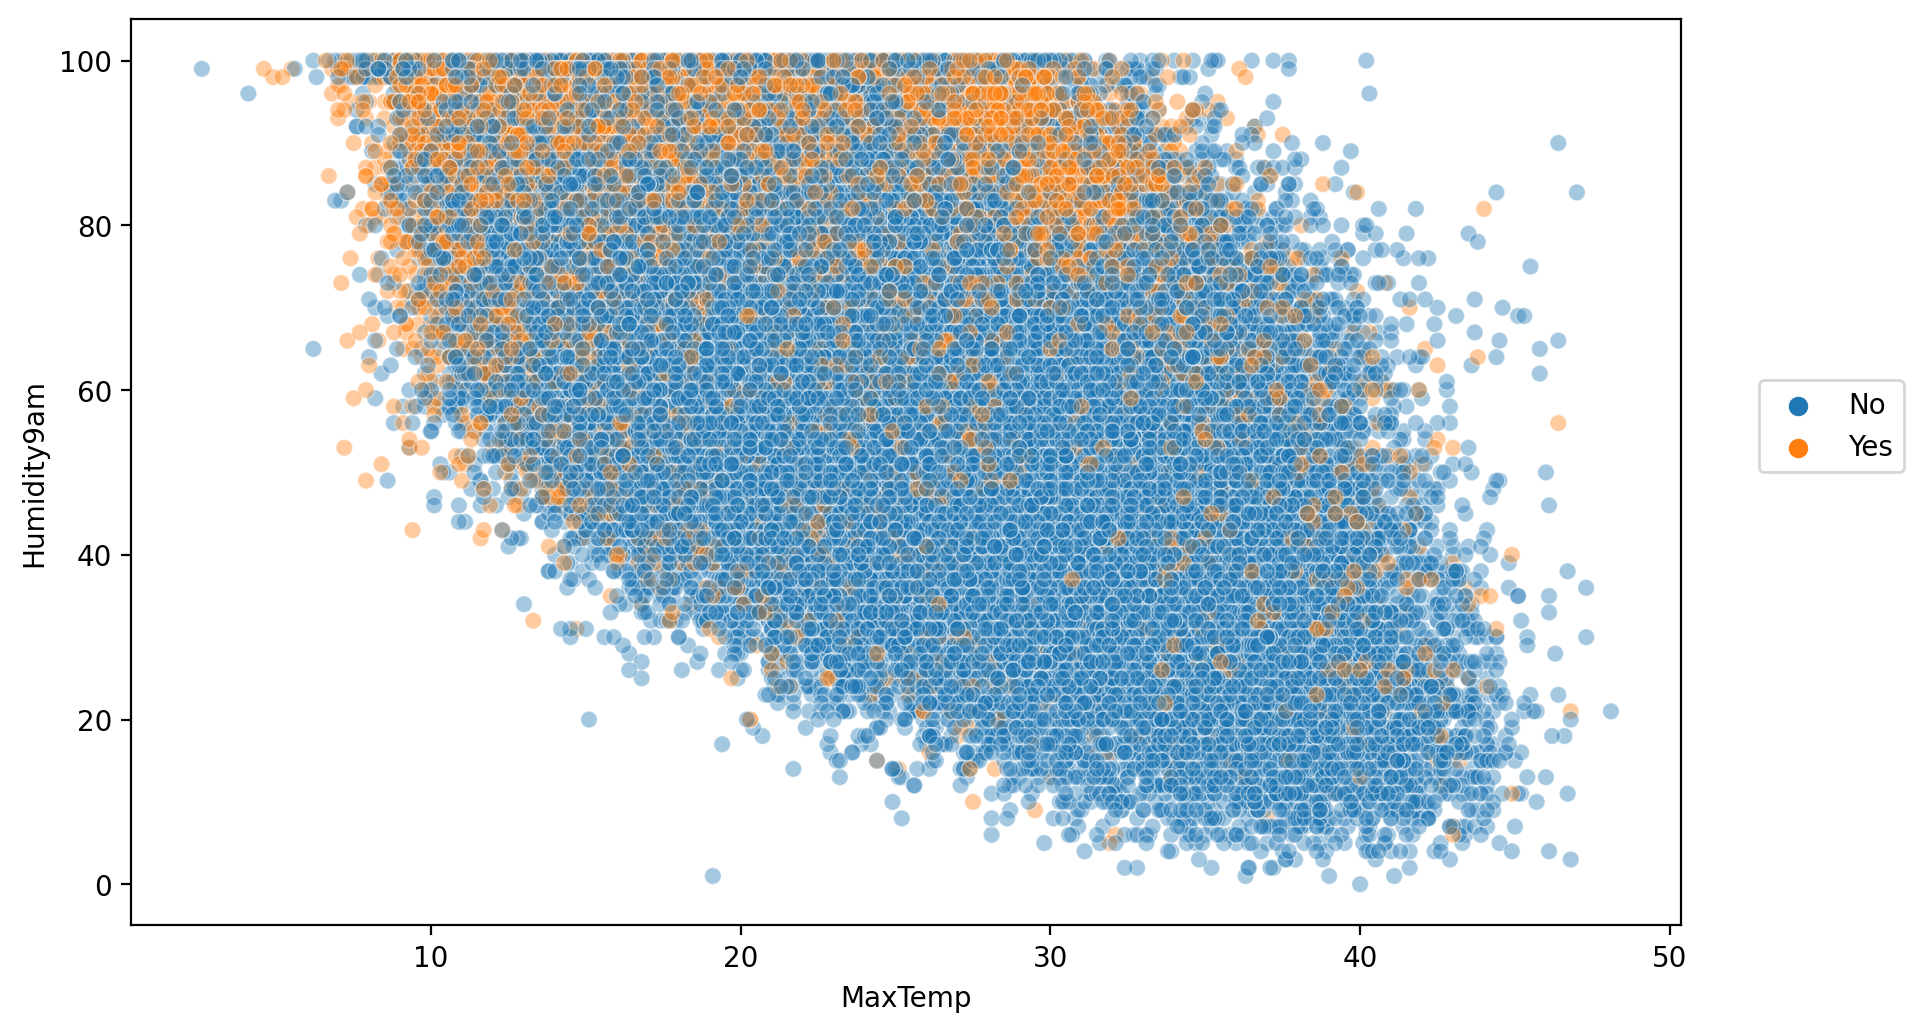

In [26]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x='MaxTemp',y='Humidity9am',hue='RainTomorrow',alpha=0.4)
plt.legend(loc=(1.05,0.5))

less max tempture and high humidity consequently had rain those Days.

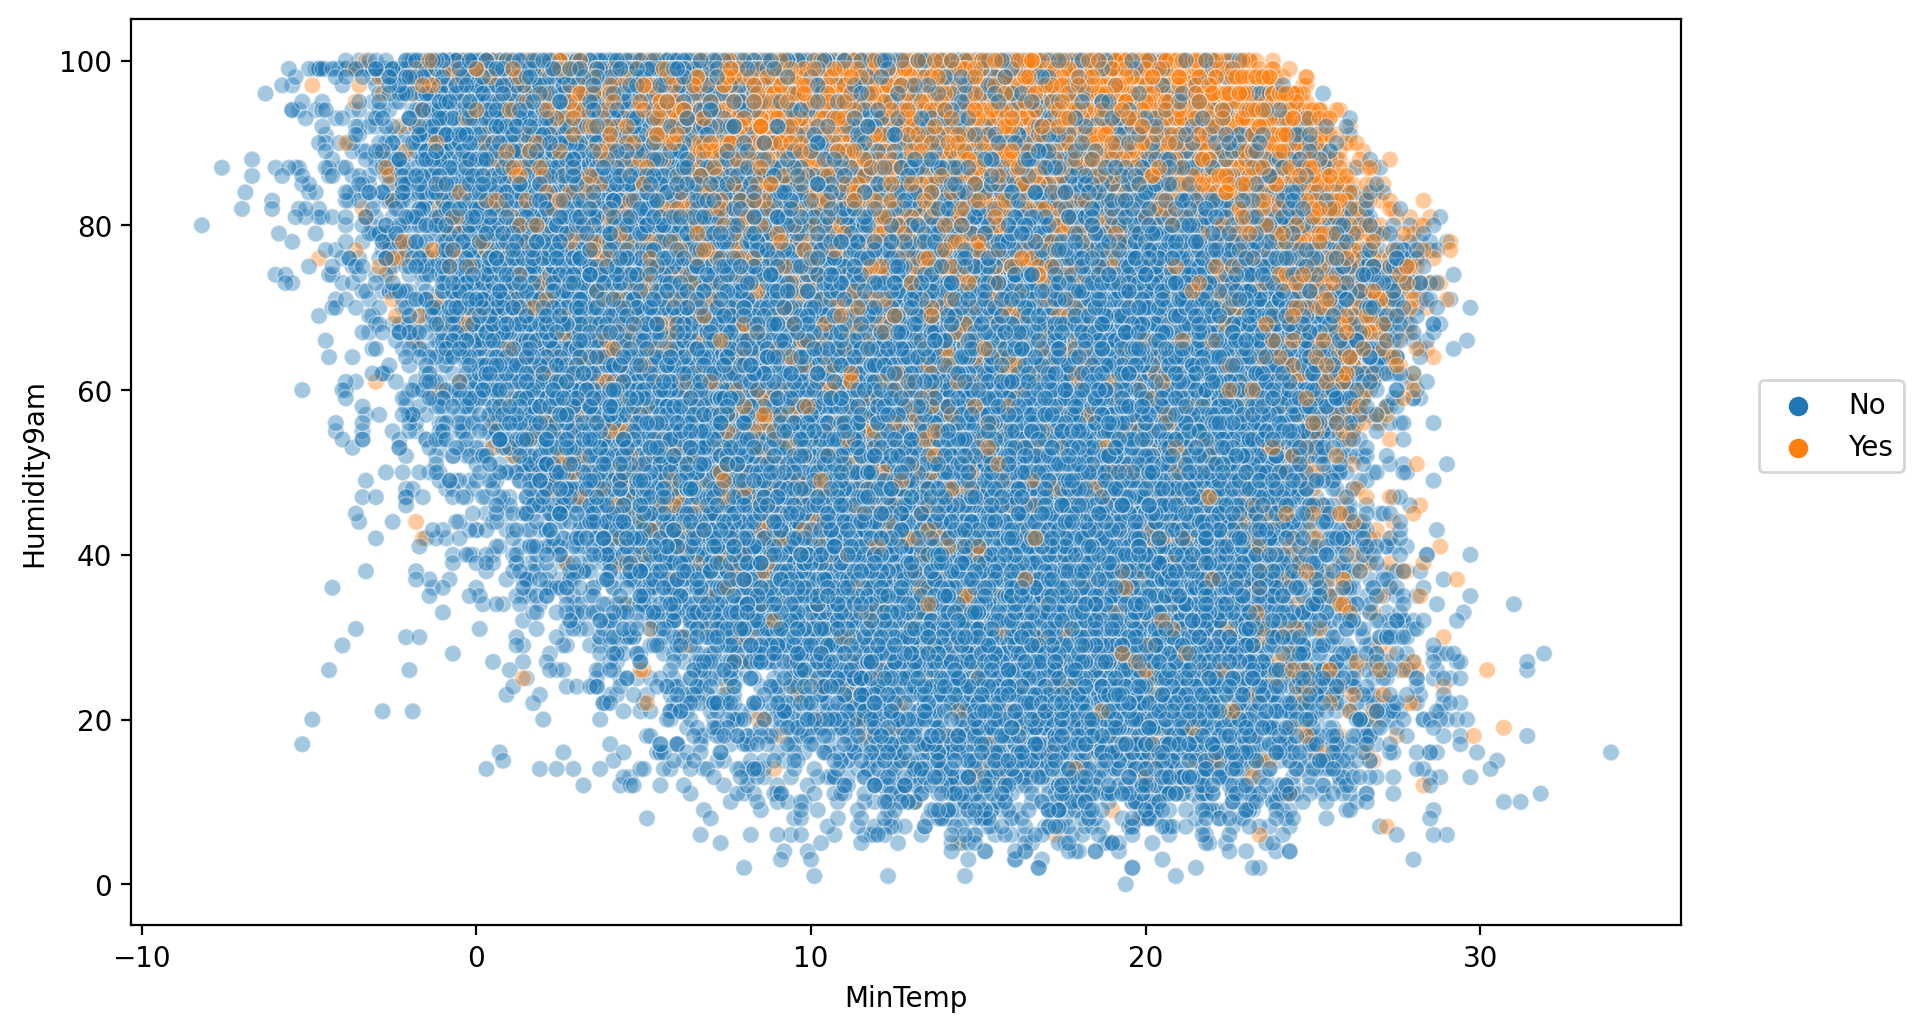

In [27]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x='MinTemp',y='Humidity9am',hue='RainTomorrow',alpha=0.4)
plt.legend(loc=(1.05,0.5))

more Minimun tempture and high humidity consequently had the rain in that day

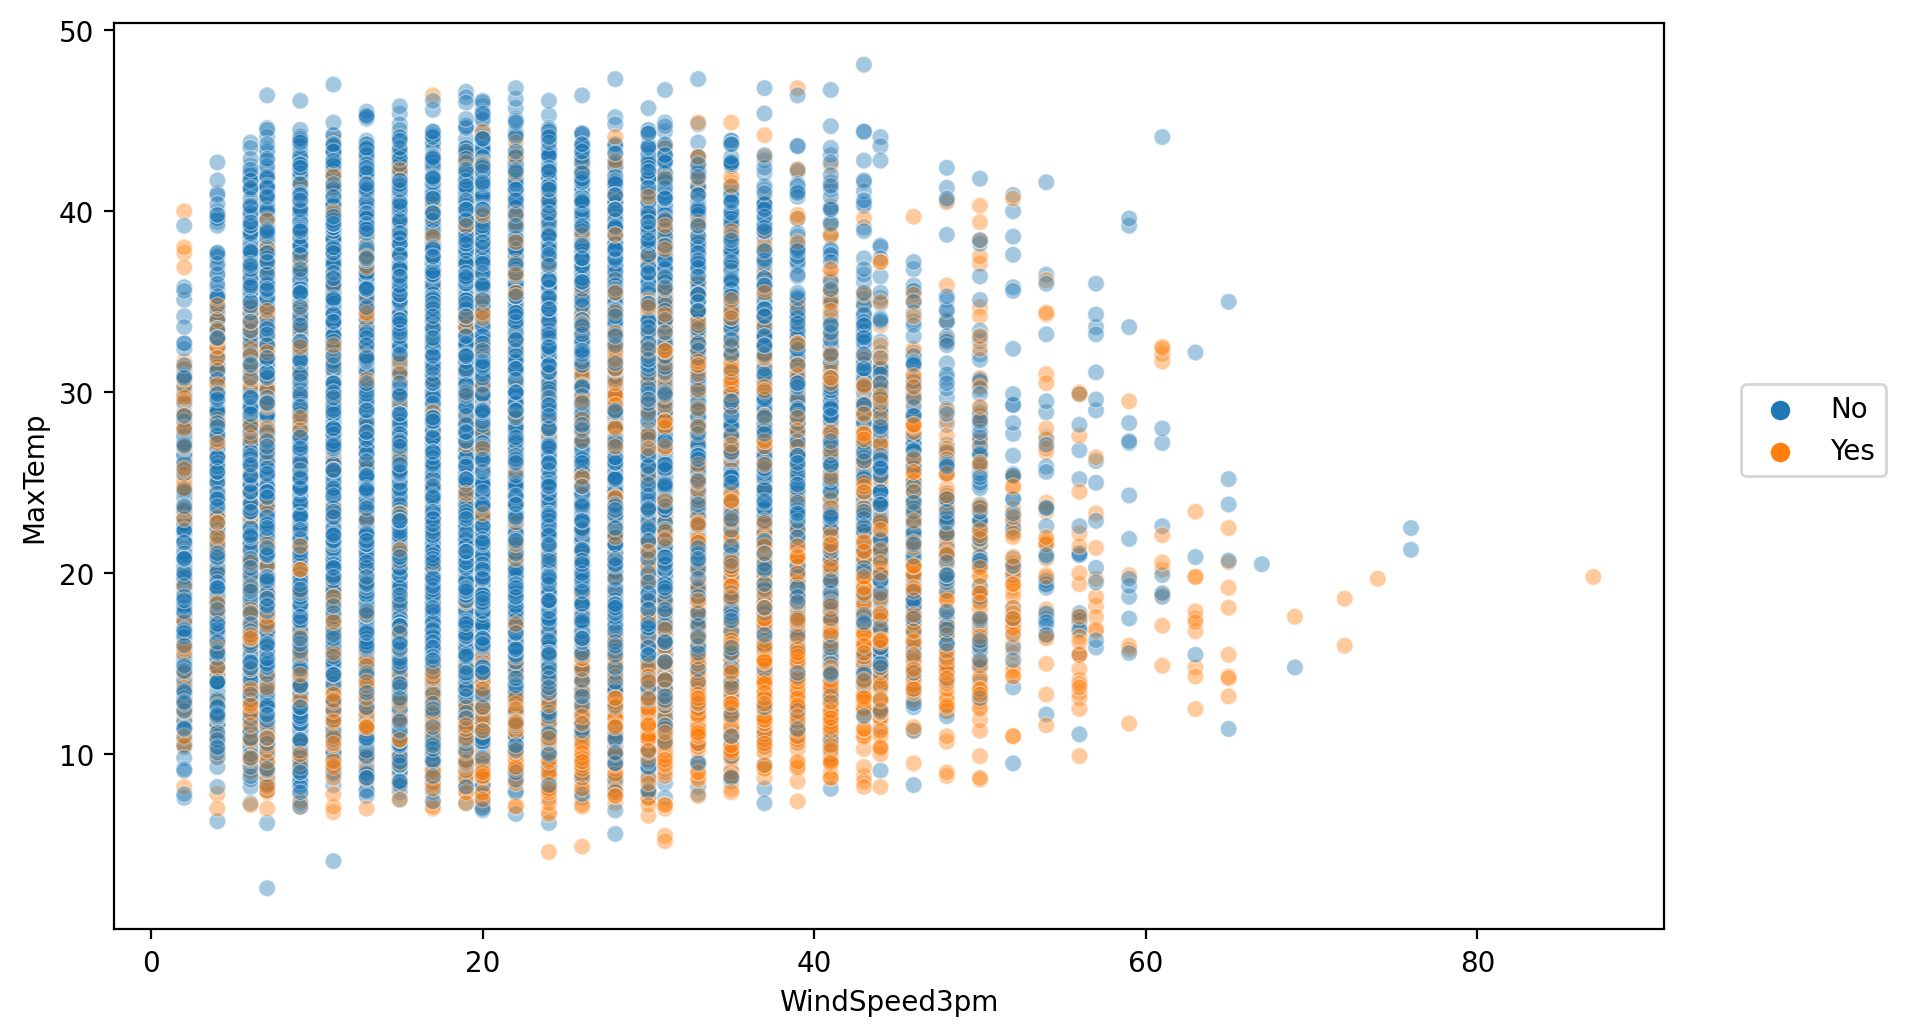

In [28]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x='WindSpeed3pm',y='MaxTemp',hue='RainTomorrow',alpha=0.4)
plt.legend(loc=(1.05,0.5))

some days, even though there is high tempture despite there had rain due to higher windspeed 

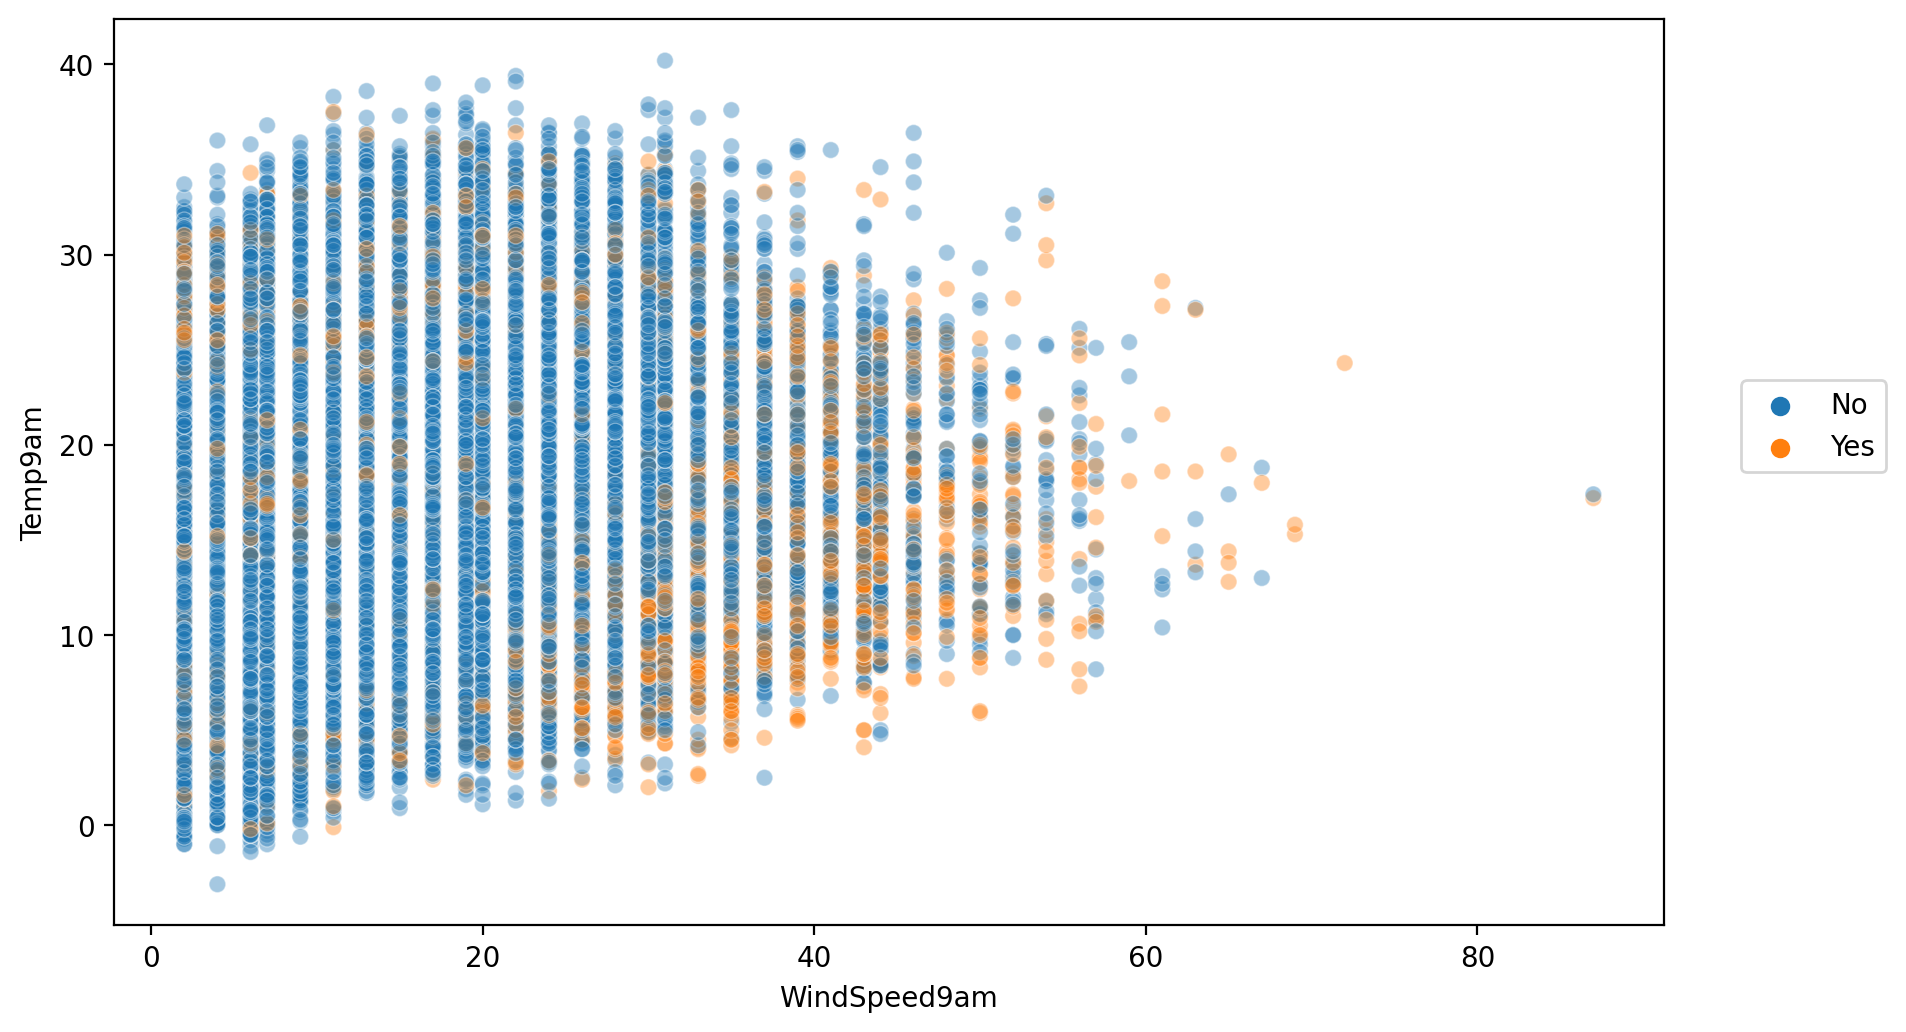

In [29]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x='WindSpeed9am',y='Temp9am',hue='RainTomorrow',alpha=0.4)
plt.legend(loc=(1.05,0.5))

although there had low tempture despite due to low Wind speed Rain had not been there.

# Data preprocessing

In [ ]:
df.drop('Date',axis=1,inplace=True)

**getting object to integers through one hot encodding**

In [30]:
df.select_dtypes(include='object')                                                                # this are the object features

Location WindGustDir WindDir9am WindDir3pm RainToday RainTomorrow
0        Albury           W          W        WNW        No           No
1        Albury         WNW        NNW        WSW        No           No
2        Albury         WSW          W        WSW        No           No
3        Albury          NE         SE          E        No           No
4        Albury           W        ENE         NW        No           No
...         ...         ...        ...        ...       ...          ...
145454    Uluru           E        ESE          E        No           No
145455    Uluru           E         SE        ENE        No           No
145456    Uluru         NNW         SE          N        No           No
145457    Uluru           N         SE        WNW        No           No
145458    Uluru          SE        SSE          N        No           No

[112994 rows x 6 columns]

In [31]:
obj = df.select_dtypes(include='object')

In [32]:
obj = pd.get_dummies(obj,drop_first=True)

In [33]:
num = df.select_dtypes(exclude='object')

In [34]:
df_ = pd.concat([num,obj],axis=1)                           # created df_ datafream for all concatinating obj and num datafream

In [35]:
df_.head()

MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0     13.4     22.9       0.6           44.0          20.0          24.0   
1      7.4     25.1       0.0           44.0           4.0          22.0   
2     12.9     25.7       0.0           46.0          19.0          26.0   
3      9.2     28.0       0.0           24.0          11.0           9.0   
4     17.5     32.3       1.0           41.0           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  ...  WindDir3pm_S  \
0         71.0         22.0       1007.7       1007.1  ...             0   
1         44.0         25.0       1010.6       1007.8  ...             0   
2         38.0         30.0       1007.6       1008.7  ...             0   
3         45.0         16.0       1017.6       1012.8  ...             0   
4         82.0         33.0       1010.8       1006.0  ...             0   

   WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
0              0               0               0              0             0   
1              0               0               0              0             0   
2              0               0               0              0             0   
3              0               0               0              0             0   
4              0               0               0              0             0   

   WindDir3pm_WNW  WindDir3pm_WSW  RainToday_Yes  RainTomorrow_Yes  
0               1               0              0                 0  
1               0               1              0                 0  
2               0               1              0                 0  
3               0               0              0                 0  
4               0               0              0                 0  

[5 rows x 102 columns]

# Data preparing

In [36]:
X = df_.drop('RainTomorrow_Yes',axis=1)

In [37]:
y = df_['RainTomorrow_Yes']

# split data into train and test 

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [40]:
X_train.shape # <----70% of data

(79095, 101)

In [41]:
X_test.shape  # <----30% of data

(33899, 101)

**for classification task i choose tree based methods and i will train those model with their defualt hyperparameter and which model would perform well i will choose that model as final model and i will tune that model hyperparameter for best Accuracy with GridsearchCV**

# Model Creation
**importing Model and performance matrix**

In [42]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import classification_report,accuracy_score,plot_confusion_matrix,plot_roc_curve

In [91]:
Decision = DecisionTreeClassifier(max_depth=5)
Decision.fit(X_train,y_train)
Decision_pred = Decision.predict(X_test)

In [92]:
print(classification_report(y_test,Decision_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90     26399
           1       0.76      0.39      0.52      7500

    accuracy                           0.84     33899
   macro avg       0.81      0.68      0.71     33899
weighted avg       0.83      0.84      0.82     33899



In [45]:
Gboost = GradientBoostingClassifier()
Gboost.fit(X_train,y_train)
Gboost_pred = Gboost.predict(X_test)

In [46]:
print(classification_report(y_test,Gboost_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     26399
           1       0.74      0.50      0.60      7500

    accuracy                           0.85     33899
   macro avg       0.81      0.72      0.75     33899
weighted avg       0.84      0.85      0.84     33899



In [47]:
Random = RandomForestClassifier()
Random.fit(X_train,y_train)
Random_pred = Random.predict(X_test)

In [145]:
print(classification_report(y_test,Random_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     26399
           1       0.77      0.50      0.60      7500

    accuracy                           0.86     33899
   macro avg       0.82      0.73      0.76     33899
weighted avg       0.85      0.86      0.84     33899



In [48]:
ADA = AdaBoostClassifier()
ADA.fit(X_train,y_train)
ADA_pred = ADA.predict(X_test)

In [49]:
print(classification_report(y_test,ADA_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     26399
           1       0.72      0.49      0.59      7500

    accuracy                           0.85     33899
   macro avg       0.80      0.72      0.75     33899
weighted avg       0.84      0.85      0.83     33899



In [56]:
Accuracy = [79,85,86,85]

In [50]:
col = ['Decision_tree','Gredient_booster','Random_forest','ADA_booster']

In [64]:
score

Accuracy             Model
0        79     Decision_tree
1        85  Gredient_booster
2        86     Random_forest
3        85       ADA_booster

<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

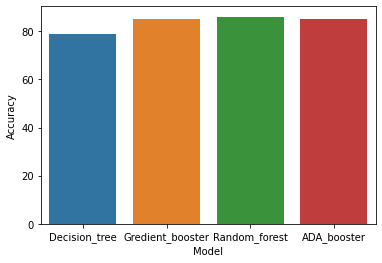

In [65]:
sns.barplot(data=score,x='Model',y='Accuracy')

I have chosen Random forest for GridsearchCV let see how we can gain Accuracy by tunning hyperparameter

In [66]:
final_model = RandomForestClassifier()

In [67]:
max_depth = [5,8,12]

In [68]:
n_estimators = [60,80,90,120] 

In [69]:
param_grid = {'max_depth':max_depth}

In [70]:
from sklearn.model_selection import GridSearchCV

In [77]:
search = GridSearchCV(final_model,param_grid=param_grid)

In [73]:
search.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 8, 12]})

In [74]:
search.best_params_                       #here i got best max_depth means how many level of tree i should have in Random forest

{'max_depth': 12}

In [76]:
param_grid = {'n_estimators':n_estimators}

In [78]:
search.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [60, 80, 90, 120]})

In [79]:
search.best_params_                              #here i got best n_estimator means how many tree i should have in Random forest

{'n_estimators': 60}

lets put this hyperparameter in model and check the Accuracy 

In [88]:
final_model = RandomForestClassifier(n_estimators=120,max_depth=18)

In [89]:
final_model.fit(X_train,y_train)
prediction = final_model.predict(X_test)

In [90]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     26399
           1       0.77      0.48      0.59      7500

    accuracy                           0.85     33899
   macro avg       0.82      0.72      0.75     33899
weighted avg       0.85      0.85      0.84     33899



In [105]:
record = X_train.iloc[0] #<----certain record 

In [107]:
record

MinTemp           -2.5
MaxTemp           12.5
Rainfall           0.0
WindGustSpeed     43.0
WindSpeed9am       2.0
                  ... 
WindDir3pm_SW      0.0
WindDir3pm_W       0.0
WindDir3pm_WNW     1.0
WindDir3pm_WSW     0.0
RainToday_Yes      0.0
Name: 49975, Length: 101, dtype: float64

In [96]:
y_train.iloc[0]          #<----that record 0 means has no rain in that condition  

0

In [101]:
final_model.predict([a])  #<----Model predictions for that record is also 0

array([0], dtype=uint8)